# 3º Trabalho - Processamento de Sinais Digitais

### Número do Grupo : G04
* Italo Carvalho Vianelli Ribeiro (RA: 769687)
* João Gabriel Viana Hirasawa (RA: 759055)
* Juliana Ferreira Alves (RA: 744794)

In [1]:
import sk_dsp_comm.sigsys as ss
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import *

In [2]:
pylab.rcParams['figure.figsize'] = (12.0, 4.0) # default (6,4)
%config InlineBackend.figure_formats=['png'] # default for inline viewing

### a)
Primeiramente foi implementado a função `conv1` que realiza a convolução de um filtro $h_n$ de ordem $M$, e um sinal causal de duração finita $x_n$ de comprimento $L$ real a partir da seguinte equação:  

\begin{align}
y_n = \sum_{m=max(0, n-L+1)}^{min(n, M)} h_m x_{n-m},\qquad n = 0,1,...,L + M - 1
\end{align}

Assim a função foi implementada utilizando a função `squeeze` do numpy para remover uma dimensão do sinal recebido e poder aceitar como entrada valores que forem inseridos tanto como linhas e colunas com o vetor de saída correspondendo com o tipo de vetor de entrada inserido.

In [3]:
def conv1(x, h):
  '''Retorna a saída y da filtragem ou convolução entre dois sinais x e h.'''

  # Forma original dos sinais
  shapes = {'x': x.shape, 'h': h.shape}

  # Comprimento dos sinais
  tam_x, tam_h = max(shapes['x']), max(shapes['h'])
  
  # Achatar os sinais para poder tratá-los
  x, h = np.squeeze(x), np.squeeze(h)

  y = np.zeros(tam_x + tam_h - 1)

  for n in range(len(y)):
    soma = 0
    teto = min(n, tam_h)
    chao = max(0, n - tam_x + 1)
    for m in range(chao, teto + 1):
      try:
        soma += h[m] * x[n - m]
      except:
        pass
    y[n] = soma
  
  # Caso entrada seja vetor coluna, transforma a saída em vetor coluna
  if len(shapes['x']) > 1 and shapes['x'][1] == 1:
    y = y.reshape((len(y), 1))

  return y

Após a implementação da função *conv1*, foi realizado a comparação da execução da função implementada com a função *convolve* do numpy a fim de verificar se obtemos o comportamento esperado

In [4]:
# Definição dos sinais x1 e h1 - vetores linha
x1 = np.asarray([1, 2, -3, 2, 1, 1])
h1 = np.asarray([1, 2, -3])

# Definição dos sinais x2 e h2 - vetores coluna
x2 = np.asarray([[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, -1, -1, -1, -1, 0, 0, 0, 0]]).T
h2 = np.asarray([[1, 4, 10, 16, 19, 16, 10, 4, 1]]).T

conv_x1_h1 = np.convolve(x1, h1)
# Não funciona vetores coluna no numpy.convolve
conv_x2_h2 = np.convolve(x2.squeeze(), h2.squeeze())

conv_x1_h1_nosso = conv1(x1, h1)
conv_x2_h2_nosso = conv1(x2, h2)

print(conv_x1_h1)
print(conv_x1_h1_nosso)
print(all(conv_x1_h1 == conv_x1_h1_nosso), '\n')

print(conv_x2_h2)
print(conv_x2_h2_nosso.squeeze())
print(all(conv_x2_h2 == conv_x2_h2_nosso.squeeze()))

[  1   4  -2 -10  14  -3  -1  -3]
[  1.   4.  -2. -10.  14.  -3.  -1.  -3.]
True 

[  0   0   0   0   1   5  15  31  49  61  61  49  30  10 -10 -30 -49 -61
 -61 -49 -31 -15  -5  -1   0   0   0   0]
[  0.   0.   0.   0.   1.   5.  15.  31.  49.  61.  61.  49.  30.  10.
 -10. -30. -49. -61. -61. -49. -31. -15.  -5.  -1.   0.   0.   0.   0.]
True


### b)
Em sequência, para observar a resposta do estado estacionário do filtro, foi  implementada a função *gera_onda* que gera uma onda quadrada de comprimento L e período K e tem como padrão os valores de comprimento igual a 200 e período de 50 amostras que no caso é os valores do sinal de entrada $x_n$ que utilizaremos para realizar os estudos desta prática.


In [5]:
def gera_onda(L = 200, K = 50):
  x = np.zeros(L)
  for n in range(L):
    if n%K < K/2:
      x[n] = 1
    else:
      x[n] = 0
  return x

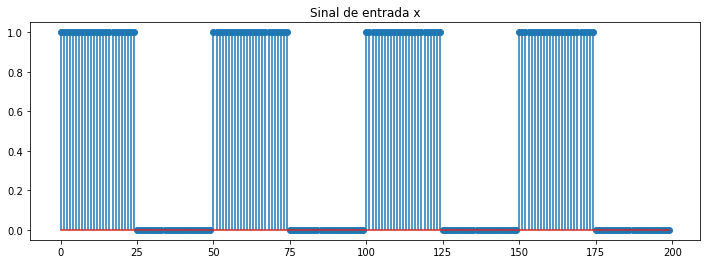

In [6]:
x = gera_onda()
stem(x, use_line_collection=True)
plt.title('Sinal de entrada x')
show()

### c)
Assim, podemos calcular o sinal de saída $y_n$ utilizando a função *conv1* com o seguinte filtro:

\begin{align}
    h_n = \left \{ \begin{matrix} 0,1, & \mbox{para }0 \le n \le 14 \mbox{ é par} \\ 0, & \mbox{caso contrário} \end{matrix} \right.
\end{align}

Assim, primeiramente, foi implementado o filtro $h_n$:

In [7]:
h = np.repeat(0.1, 14)

Text(0.5, 1.0, 'Filtro h')

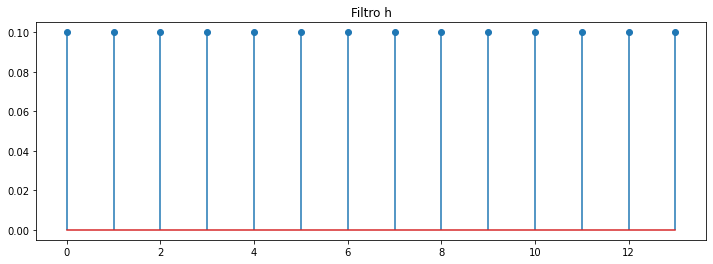

In [8]:
stem(h, use_line_collection=True)
plt.title('Filtro h')

A partir da do cálculo de sinal de saída $y_n$ a seguir utilizando a função *conv1* previamente implementada foi possível notas os seguintes comportamentos nos gráficos obtidos a medida que a onda quadrada liga:    

* Transiente ligado: Caracterizado por uma função linear crescente sem overshooting que inicia assim que a onda quadrada "liga", em que o valor do sinal vai acumulando de 0.1 em 0.1 nas 14 amostras do filtro até chegar em 1.4 e chega em regime estável;

* Estável: O comportamento estável ocorre nos intervalos de $n = 50k + 14$ até $n = 50k + 25$ sendo $k$ um número inteiro positivo, que representao o período em que o sinal de entrada $x_n$ permanece "ligado", com o valor das amostras com valor 1, após o período transiente ligado, fazendo com que ao realizar a convolução com o filtro $h_n$ as amostras continuem com valor constante de 1.4;

* Transiente desligado: Caracterizado por uma função linear decrescente que inicia ao fim do comportamento de estabilização quando a onda quadrada "desliga", ou seja, quando o sinal de entrada $x_n$ passa a ter valor 0, em que ao realizar a convolução os valores acumulados vão diminuindo de 0.1 em 0.1 por 14 amostras até chegar ao valor 0 novamente "desligando" o sinal de saída;

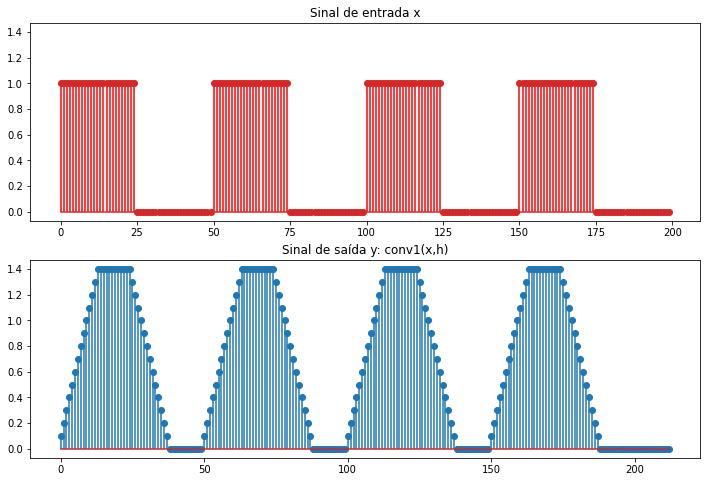

In [9]:
fig, axs = plt.subplots(2, 1, sharey=True, figsize = (12.0, 8.0))

axs[0].stem(x, use_line_collection=True, linefmt='r', markerfmt='C3o')
axs[0].set_title('Sinal de entrada x')

axs[1].stem(conv1(x, h), use_line_collection=True)
axs[1].set_title('Sinal de saída y: conv1(x,h)')

show()

### d)

Como esperado após obter o comportamento esperado nos testes realizados no item  **a)** a função implementada, produziu os mesmos resultados que a função `numpy.convolve`.

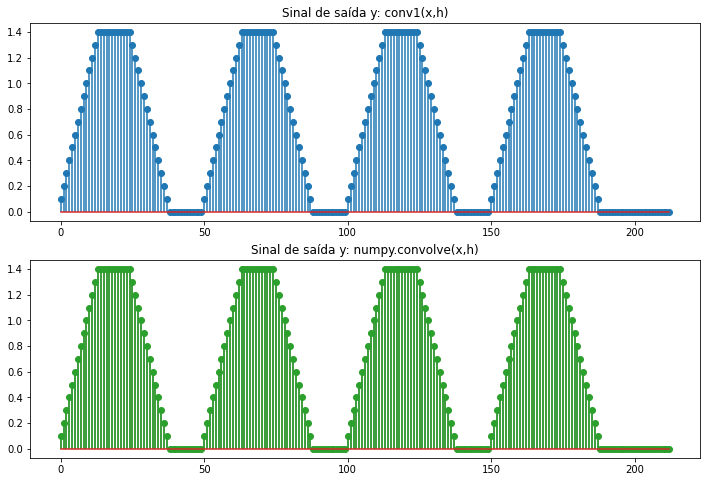

In [10]:
fig, axs = plt.subplots(2, 1, sharey=True, figsize = (12.0, 8.0))

axs[0].stem(conv1(x, h), use_line_collection=True)
axs[0].set_title('Sinal de saída y: conv1(x,h)')

axs[1].stem(np.convolve(x, h), use_line_collection=True, linefmt='g',markerfmt= 'C2o')
axs[1].set_title('Sinal de saída y: numpy.convolve(x,h)')

show()

### e)

Agora, vamos aplicar a relação entre convolução no domínio do tempo e no domínio da frequência:

\begin{align}
x_n * h_n = \mathrm{ifft}\left[\mathrm{fft}(x_n)\cdot\mathrm{fft}(h_n)\right]
\end{align}

Analisando por uma ótica de otimização, esse método pode se mostrar uma maneira mais eficiente de se lidar com a operação de convolução. Como implementado anteriormente, nossa função original de convolução possuía dois laços de repetição encadeados, puxando a eficiência para pelo menos $O(n^2)$.

Usando a FFT, sabemos que essa operação (e sua inversa) é da ordem de $O(n\cdot\text{log}_{{}_2}n)$. A multiplicação par-a-par é uma operação facilmente paralelizável, mas uma implementação naive tem complexidade $O(n)$. Logo, é um ganho significativo para valores grandes de $n$, por exemplo (para $n > 2$).

In [11]:
def conv2(x, h):
  '''Retorna a saída y da filtragem ou convolução entre dois sinais x e h.'''

  # Forma original dos sinais
  shapes = {'x': x.shape, 'h': h.shape}

  # Comprimento dos sinais
  tam_x, tam_h = max(shapes['x']), max(shapes['h'])
  
  # Achatar os sinais para poder tratá-los
  x, h = np.squeeze(x), np.squeeze(h)
  
  # Tamanho resultante da FFT -- a menor potência de 2 que comporte o resultado
  tam_fft = 2 ** int(ceil(np.log2(abs(tam_x + tam_h - 1))))

  # Realizar o padding dos dois sinais
  x_pad = np.pad(x, (0, tam_fft - tam_x))
  h_pad = np.pad(h, (0, tam_fft - tam_h))

  # Realizar a FFT dos dois sinais
  X = np.fft.fft(x_pad)
  H = np.fft.fft(h_pad)

  # Convolução no domínio do tempo = Multiplicação no domínio da frequência
  Y = X * H

  # Parte real da transformada inversa de Fourier da saída
  y = np.real(np.fft.ifft(Y))

  # Apenas a parte significativa da saída
  y = y[:tam_x + tam_h - 1]

  # Caso entrada seja vetor coluna, transforma a saída em vetor coluna
  if len(shapes['x']) > 1 and shapes['x'][1] == 1:
    y = y.reshape((len(y), 1))

  return y

### f)

Novamente, vamos analisar os gráficos produzidos pela entrada e pela saída. Podemos ver que temos o mesmo resultado que no item **c)**, com a entrada de onda quadrada e os estágios da saída indo de acordo com a ativação ou desativação do sinal de entrada.

Ao compararmos a nova função com o `numpy.convolve`, podemos ver que o sinal obtido é exatamente o mesmo, assim como ocorreu no item **d)**.

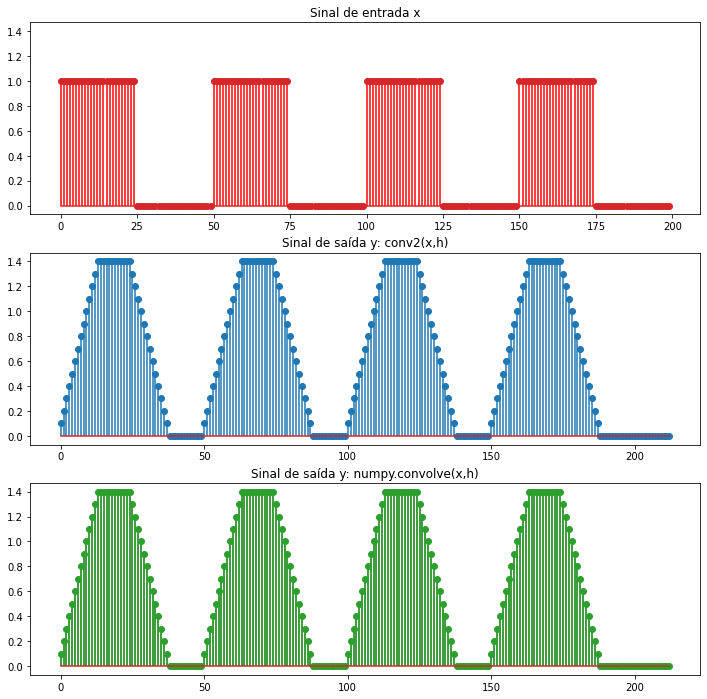

In [12]:
fig, axs = plt.subplots(3,1, sharey=True, figsize = (12.0, 12.0))

axs[0].stem(x, use_line_collection=True, linefmt='r', markerfmt='C3o')
axs[0].set_title('Sinal de entrada x')

axs[1].stem(conv2(x, h), use_line_collection=True)
axs[1].set_title('Sinal de saída y: conv2(x,h)')

axs[2].stem(np.convolve(x, h), use_line_collection=True, linefmt='g',markerfmt= 'C2o')
axs[2].set_title('Sinal de saída y: numpy.convolve(x,h)')

show()

### g)

Aqui, podemos ver que nosso novo filtro vai decaindo de 0.25 até próximo de 0.

In [13]:
h_g = np.asarray([0.25 * 0.75**n for n in range(15)])

Text(0.5, 1.0, 'Filtro h')

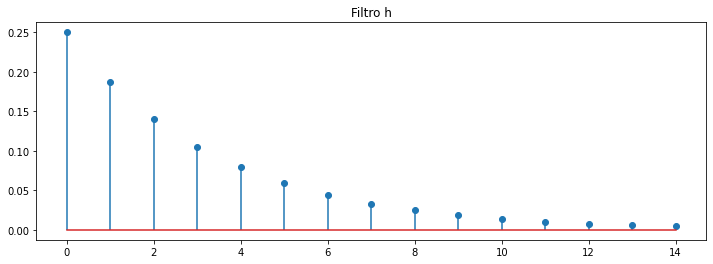

In [14]:
stem(h_g, use_line_collection=True)
plt.title('Filtro h')

Da mesma forma que no item **c)**, podemos verificar aqui as características da saída com base no estado da entrada. No estado **transiente ligado**: temos uma subida rápida e exponencial até o valor de 1. Então, a saída atinge o estado **estável**, onde permanece enquanto a entrada está alta. Assim que a entrada fica baixa, o sinal decai rapidamente e exponencialmente, até zerar novamente.

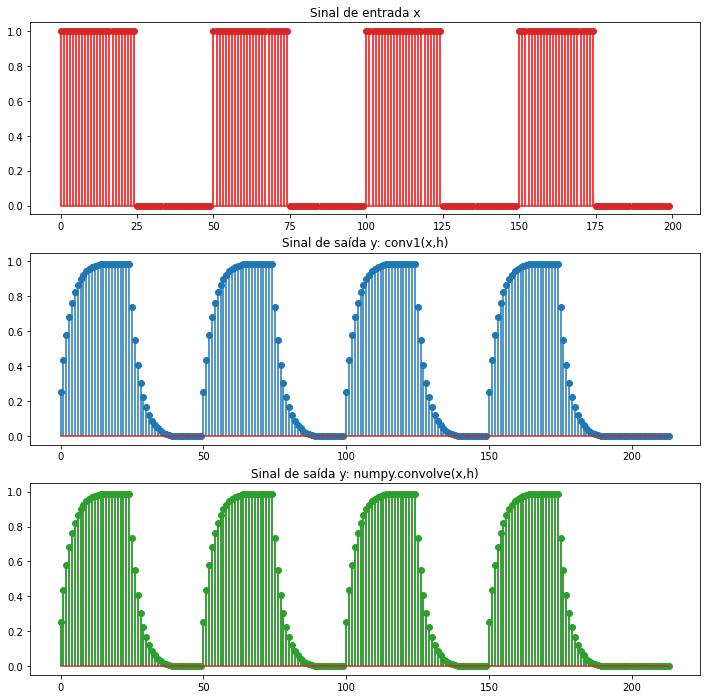

In [15]:
fig, axs = plt.subplots(3,1, sharey=True, figsize = (12.0, 12.0))

axs[0].stem(x, use_line_collection=True, linefmt='r', markerfmt='C3o')
axs[0].set_title('Sinal de entrada x')

axs[1].stem(conv1(x, h_g), use_line_collection=True)
axs[1].set_title('Sinal de saída y: conv1(x,h)')

axs[2].stem(np.convolve(x, h_g), use_line_collection=True,linefmt='g',markerfmt= 'C2o')
axs[2].set_title('Sinal de saída y: numpy.convolve(x,h)')

show()

Também podemos ver que o resultado da função elaborada atingiu o mesmo resultado neste filtro que a função do `numpy.convolve`.

### **i)**

Neste tópico criou-se um filtro com resposta ao impuso finita $h_n$, para $0 \le n \le 24$, tendo cmo sinal de entrada $x(n)$. Sendo que:

 $h_n =(0, 95)^n$
 
 $x(n)=δ(n)+ 2δ(n − 40) + 2δ(n − 70) + δ(n − 80)$

 Desta forma o sinal de entrada é composto por 4 impulsos com intesidades variando entre 1 e 2 (valores que acompanham δ). Já $h_n$ é um sinal que decai suavemente ao longo do tempo.

In [16]:
h_i = np.asarray([0.95 ** n for n in range(25)])
n_i = np.arange(0, 120 + 1)
x_i = ss.dimpulse(n_i) + 2 * ss.dimpulse(n_i - 40) + 2 * ss.dimpulse(n_i - 70) + ss.dimpulse(n_i - 80)

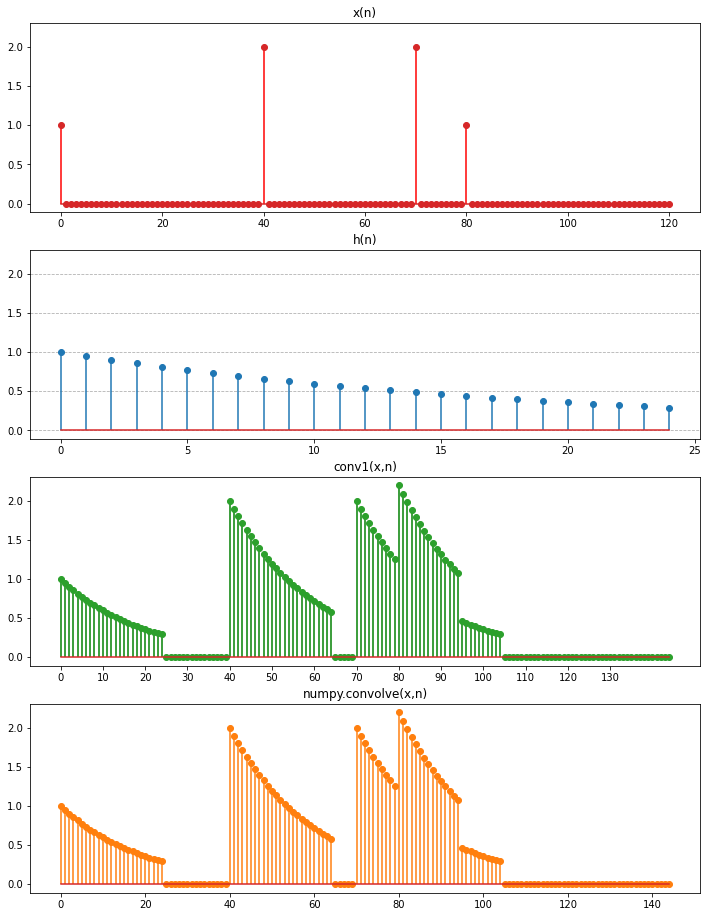

In [17]:
fig, axs = plt.subplots(4,1, sharey=True, figsize = (12.0, 16.0))

axs[0].stem(x_i, use_line_collection=True, linefmt='r', markerfmt='C3o')
axs[0].set_title('x(n)')

axs[1].stem(h_i, use_line_collection=True)
axs[1].set_title('h(n)')
axs[1].grid(axis='y', linestyle='--')

axs[2].stem(conv1(x_i, h_i), use_line_collection=True, linefmt='g', markerfmt='C2o')
axs[2].set_title('conv1(x,n)')
axs[2].set_xticks(range(0,140,10))

axs[3].stem(np.convolve(x_i, h_i), use_line_collection=True, linefmt='C1', markerfmt='C1o')
axs[3].set_title('numpy.convolve(x,n)')


show()

**Linearidade do Sistema**

Para o sistema ser linear ele deve satisfazer as seguintes propriedades:

* Aditividade: $x_1(t) + x_2(t) → y_1(t) + y_2(t)$
* Homogeneidade: $a \cdot x_1(t) → a \cdot y_1(t)$

Sendo assim, como há momentos em que a entrada é 0 e a saída é diferente de 0, a proprieade de homogeneidade é descumprida, ou seja o sistema não é linear.

**Invariância no tempo**

A seguir será deslocado o sinal de entrada no tempo, para analisar o comportamento de sua saída.

In [18]:
deslocamento = 5
#criando a entrada deslocada no tempo
x_i_deslocado = ss.dimpulse(n_i-deslocamento) + 2 * ss.dimpulse(n_i - 40- deslocamento) + 2 * ss.dimpulse(n_i - 70- deslocamento) + ss.dimpulse(n_i - 80 - deslocamento)

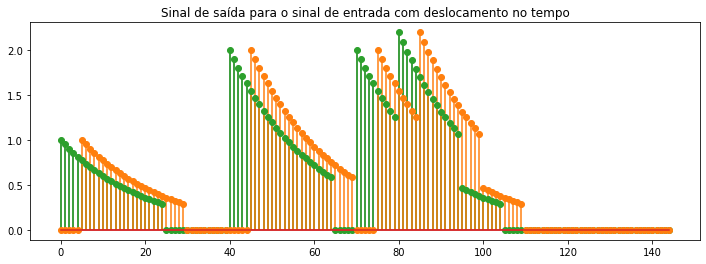

In [19]:
stem(conv1(x_i, h_i), use_line_collection=True, linefmt='g', markerfmt='C2o')
stem(conv1(x_i_deslocado, h_i), use_line_collection=True, linefmt='C1', markerfmt='C1o')
plt.title('Sinal de saída para o sinal de entrada com deslocamento no tempo')
show()

Desta forma é possível verificar que o sinal é invariante no tempo, uma vez que mesmo com o sinal de entrada deslocado a resposta continua com a mesma.